In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10


%matplotlib inline
tf.__version__

'2.0.0'

In [2]:
#สร้าง class ใน ดาต้าเซต
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
(X_train,y_train), (X_test,y_test)=cifar10.load_data()

In [4]:
X_train = X_train / 255.0
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test = X_test / 255.0
X_test.shape

(10000, 32, 32, 3)

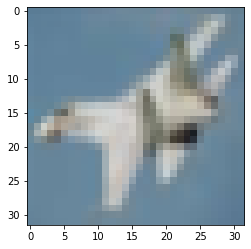

In [6]:
plt.imshow(X_test[10])

In [7]:
model = tf.keras.models.Sequential()

In [8]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[32,32,3]))

In [9]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))

In [10]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [11]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [12]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [13]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [14]:
model.add(tf.keras.layers.Flatten())

In [15]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dropout(rate= 0.2))

In [16]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["sparse_categorical_accuracy"])

In [19]:
model.fit(X_train,y_train,epochs= 20 )

Train on 50000 samples
Epoch 1/20
50000/50000 [==============================] - 24s 484us/sample - loss: 1.4947 - sparse_categorical_accuracy: 0.4551
Epoch 2/20
50000/50000 [==============================] - 10s 207us/sample - loss: 1.0422 - sparse_categorical_accuracy: 0.6306
Epoch 3/20
50000/50000 [==============================] - 10s 205us/sample - loss: 0.8636 - sparse_categorical_accuracy: 0.6971
Epoch 4/20
50000/50000 [==============================] - 10s 206us/sample - loss: 0.7477 - sparse_categorical_accuracy: 0.7389
Epoch 5/20
50000/50000 [==============================] - 10s 207us/sample - loss: 0.6560 - sparse_categorical_accuracy: 0.7678
Epoch 6/20
50000/50000 [==============================] - 10s 206us/sample - loss: 0.5821 - sparse_categorical_accuracy: 0.7936
Epoch 7/20
50000/50000 [==============================] - 11s 212us/sample - loss: 0.5105 - sparse_categorical_accuracy: 0.8190
Epoch 8/20
50000/50000 [==============================] - 10s 207us/sample - loss

In [21]:
test_loss,test_acc = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [22]:
print("acc : {}".format(test_acc))

acc : 0.7476999759674072
